# Get the data

In [52]:
import pandas as pd
import sqlite3
import numpy as np

## Get the data from the sqlite database

In [2]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

In [6]:
cursor.execute("SELECT name from sqlite_master WHERE type = 'table'")
tables =cursor.fetchall()


[('sqlite_sequence',), ('Matches',), ('Teams_in_Matches',), ('Teams',), ('Unique_Teams',)]


get all the tables  and create dataframes

In [17]:
def get_pdframe(table):
    cmd = "SELECT * FROM {}".format(table)
#     print(cmd)
    cursor.execute(cmd)
    df = pd.DataFrame(cursor.fetchall())
    df.columns = [i[0] for i in cursor.description]
    return df

In [39]:
sqlite_seq_df = get_pdframe(tables[0][0])
matches_df = get_pdframe(tables[1][0])
teams_in_matches_df = get_pdframe(tables[2][0])
teams_df = get_pdframe(tables[3][0])
unique_teams_df = get_pdframe(tables[4][0])

### Lets inspect the dataframes

In [18]:
sqlite_seq_df.head()

,name,seq
0,Matches,46774
1,Unique_Teams,128


In [42]:
matches_df = matches_df[matches_df.Season==2011];
# teams_in_matches_df.head();

In [21]:
teams_df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [22]:
unique_teams_df.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


Look for duplicates or NAs

In [43]:
matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1092,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
1093,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
1094,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
1095,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [46]:
matches_df.drop_duplicates(inplace=True)

In [48]:
matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1092,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
1093,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
1094,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
1095,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [67]:
m_df = matches_df.drop(['Div','FTHG','FTAG'],axis=1)

In [68]:
m_df['home_win'] = np.where(m_df['FTR']=='H', 1,0)
m_df['draw'] = np.where(m_df['FTR']=='D', 1,0)

In [71]:
m_df.head()

,Match_ID,Season,Date,HomeTeam,AwayTeam,FTR,home_win,draw
1091,1092,2011,2012-03-31,Nurnberg,Bayern Munich,A,0,0
1092,1093,2011,2011-12-11,Stuttgart,Bayern Munich,A,0,0
1093,1094,2011,2011-08-13,Wolfsburg,Bayern Munich,A,0,0
1094,1095,2011,2011-11-27,Mainz,Bayern Munich,H,1,0
1095,1096,2011,2012-02-18,Freiburg,Bayern Munich,D,0,1


In [72]:
m_df[m_df.HomeTeam=='Bayern Munich']

,Match_ID,Season,Date,HomeTeam,AwayTeam,FTR,home_win,draw
1121,1122,2011,2011-11-19,Bayern Munich,Dortmund,A,0,0
1177,1178,2011,2011-12-16,Bayern Munich,FC Koln,H,1,0
1196,1197,2011,2011-09-10,Bayern Munich,Freiburg,H,1,0
1210,1211,2011,2011-08-20,Bayern Munich,Hamburg,H,1,0
1234,1235,2011,2012-02-11,Bayern Munich,Kaiserslautern,H,1,0
1261,1262,2011,2011-09-24,Bayern Munich,Leverkusen,H,1,0
1292,1293,2011,2011-10-29,Bayern Munich,Nurnberg,H,1,0
1309,1310,2011,2012-02-26,Bayern Munich,Schalke 04,H,1,0
1323,1324,2011,2012-04-28,Bayern Munich,Stuttgart,H,1,0
1334,1335,2011,2011-12-03,Bayern Munich,Werder Bremen,H,1,0


## Strategy
From the tables above, we only need the matches table, and we need to split it to get the info from both teams

Let's create a dataframe for the Home teams, and a dataframe for the away teams

In [121]:
cmd = """SELECT Match_ID, Date, HomeTeam as Team, FTR, FTHG as Goals FROM {}
        WHERE Season=2011
        """.format(tables[1][0])
print(cmd)
cursor.execute(cmd)
mhdf = pd.DataFrame(cursor.fetchall())
mhdf.columns = [i[0] for i in cursor.description]
mhdf.head()

SELECT Match_ID, Date, HomeTeam as Team, FTR, FTHG as Goals FROM Matches
        WHERE Season=2011
        


,Match_ID,Date,Team,FTR,Goals
0,1092,2012-03-31,Nurnberg,A,0
1,1093,2011-12-11,Stuttgart,A,1
2,1094,2011-08-13,Wolfsburg,A,0
3,1095,2011-11-27,Mainz,H,3
4,1096,2012-02-18,Freiburg,D,0


Lets create columns for win, draw, loss, number of games

In [145]:
mhdf['win'] = np.where(mhdf['FTR']=='H', 1,0)
mhdf['draw'] = np.where(mhdf['FTR']=='D', 1,0)
mhdf['loss'] = np.where(mhdf['FTR']=='A', 1,0)
mhdf['ngames'] = 1
mhdf.head(10)

,Match_ID,Date,Team,FTR,Goals,win,draw,loss,ngames
0,1092,2012-03-31,Nurnberg,A,0,0,0,1,1
1,1093,2011-12-11,Stuttgart,A,1,0,0,1,1
2,1094,2011-08-13,Wolfsburg,A,0,0,0,1,1
3,1095,2011-11-27,Mainz,H,3,1,0,0,1
4,1096,2012-02-18,Freiburg,D,0,0,1,0,1
5,1097,2012-01-20,M'gladbach,H,3,1,0,0,1
6,1098,2012-02-04,Hamburg,D,1,0,1,0,1
7,1099,2012-04-21,Werder Bremen,A,1,0,0,1,1
8,1100,2011-09-18,Schalke 04,A,0,0,0,1,1
9,1101,2011-10-23,Hannover,H,2,1,0,0,1


And let's repeat for the away teams

In [146]:
cmd = """SELECT Match_ID, Date, AwayTeam as Team, FTR, FTAG as Goals FROM {}
        WHERE Season=2011
        """.format(tables[1][0])
print(cmd)
cursor.execute(cmd)
madf = pd.DataFrame(cursor.fetchall())
madf.columns = [i[0] for i in cursor.description]
madf.head()

SELECT Match_ID, Date, AwayTeam as Team, FTR, FTAG as Goals FROM Matches
        WHERE Season=2011
        


,Match_ID,Date,Team,FTR,Goals
0,1092,2012-03-31,Bayern Munich,A,1
1,1093,2011-12-11,Bayern Munich,A,2
2,1094,2011-08-13,Bayern Munich,A,1
3,1095,2011-11-27,Bayern Munich,H,2
4,1096,2012-02-18,Bayern Munich,D,0


In [147]:
madf['win'] = np.where(madf['FTR']=='A', 1,0)
madf['draw'] = np.where(madf['FTR']=='D', 1,0)
madf['loss'] = np.where(mhdf['FTR']=='H', 1,0)
madf['ngames'] = 1
madf.head()

,Match_ID,Date,Team,FTR,Goals,win,draw,loss,ngames
0,1092,2012-03-31,Bayern Munich,A,1,1,0,0,1
1,1093,2011-12-11,Bayern Munich,A,2,1,0,0,1
2,1094,2011-08-13,Bayern Munich,A,1,1,0,0,1
3,1095,2011-11-27,Bayern Munich,H,2,0,0,1,1
4,1096,2012-02-18,Bayern Munich,D,0,0,1,0,1


In [148]:
mhdf.head()

,Match_ID,Date,Team,FTR,Goals,win,draw,loss,ngames
0,1092,2012-03-31,Nurnberg,A,0,0,0,1,1
1,1093,2011-12-11,Stuttgart,A,1,0,0,1,1
2,1094,2011-08-13,Wolfsburg,A,0,0,0,1,1
3,1095,2011-11-27,Mainz,H,3,1,0,0,1
4,1096,2012-02-18,Freiburg,D,0,0,1,0,1


In [149]:
# Lets look  at the original table to make sure we got all the info
matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1092,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
1093,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
1094,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
1095,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


### Let's merger home and away data frames

In [150]:
all_matches_df =madf.append(mhdf, ignore_index=True)

In [151]:
all_matches_df.sort_values('Match_ID').head() #drop Match_ID

,Match_ID,Date,Team,FTR,Goals,win,draw,loss,ngames
0,1092,2012-03-31,Bayern Munich,A,1,1,0,0,1
992,1092,2012-03-31,Nurnberg,A,0,0,0,1,1
1,1093,2011-12-11,Bayern Munich,A,2,1,0,0,1
993,1093,2011-12-11,Stuttgart,A,1,0,0,1,1
2,1094,2011-08-13,Bayern Munich,A,1,1,0,0,1


In [170]:
all_matches_df.drop(['FTR'], axis=1, inplace=True)

KeyError: "['FTR'] not found in axis"

In [186]:
all_matches_df.head()

,Match_ID,Date,Team,Goals,win,draw,loss,ngames
0,1092,2012-03-31,Bayern Munich,1,1,0,0,1
1,1093,2011-12-11,Bayern Munich,2,1,0,0,1
2,1094,2011-08-13,Bayern Munich,1,1,0,0,1
3,1095,2011-11-27,Bayern Munich,2,0,0,1,1
4,1096,2012-02-18,Bayern Munich,0,0,1,0,1


## Group by Team and add some results

In [192]:
teams_df = all_matches_df.groupby('Team').sum()

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline


In [193]:
teams_df = teams_df.reset_index()
teams_df.head()

,Team,Match_ID,Goals,win,draw,loss,ngames
0,Aachen,50982,30,6,13,15,34
1,Arsenal,1697948,74,21,7,10,38
2,Aston Villa,1697973,37,7,17,14,38
3,Augsburg,50056,36,8,14,12,34
4,Bayern Munich,41598,77,23,4,7,34


In [194]:
teams_df.drop(['Match_ID'],axis=1, inplace=True)

## Let's get the weather data for the current time

In [224]:
import requests

In [225]:
# test just one item
api = 'https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050'

In [226]:
r = requests.get(api) #put url here in the bananas!
type(r)

requests.models.Response

In [229]:
wdata = r.json()

In [230]:
wdata.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [234]:
wdata['daily']['data'][0]['time']

1558476000

In [238]:
# We will need to get the weather data for the day of the matches, so we will need to convert the date to unix time
1312160400

matches_df['Date']

165

In [239]:
import datetime

In [304]:
matches_df['mydate'] = pd.to_datetime(matches_df['Date'])

In [313]:
# matches_df['epoch'] = matches_df.mydate.astype('datetime64[s]').astype(int)
matches_df['epoch'] = matches_df.mydate.astype(int)
matches_df['epoch'] = matches_df['epoch']/1e9
matches_df.head()
# matches_df.info()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,mydate,epoch
1091,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012-03-31,1.333152e+09
1092,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,2011-12-11,1.323562e+09
1093,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,2011-08-13,1.313194e+09
1094,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,2011-11-27,1.322352e+09
1095,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,2012-02-18,1.329523e+09


### Let's try the first date

In [262]:
api = 'https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,'+ str(epoch)

In [252]:
api

'https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1333152000'

In [263]:
r = requests.get(api) #

In [254]:
wdata = r.json()

In [265]:
print(r)
r.status_code

<Response [200]>


200

### Inspect the json data from the API

In [255]:
wdata.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [256]:
wdata['daily']

{'data': [{'time': 1333144800,
   'summary': 'Breezy until afternoon and mostly cloudy throughout the day.',
   'icon': 'wind',
   'sunriseTime': 1333168981,
   'sunsetTime': 1333215601,
   'moonPhase': 0.27,
   'precipIntensity': 0.0003,
   'precipIntensityMax': 0.0029,
   'precipIntensityMaxTime': 1333180800,
   'precipProbability': 0.56,
   'precipType': 'rain',
   'temperatureHigh': 44.62,
   'temperatureHighTime': 1333188000,
   'temperatureLow': 30.12,
   'temperatureLowTime': 1333256400,
   'apparentTemperatureHigh': 36.57,
   'apparentTemperatureHighTime': 1333188000,
   'apparentTemperatureLow': 24.07,
   'apparentTemperatureLowTime': 1333256400,
   'dewPoint': 33.52,
   'humidity': 0.7,
   'windSpeed': 15.81,
   'windGust': 40.27,
   'windGustTime': 1333162800,
   'windBearing': 302,
   'cloudCover': 0.71,
   'uvIndex': 3,
   'uvIndexTime': 1333184400,
   'visibility': 6.13,
   'temperatureMin': 38.69,
   'temperatureMinTime': 1333202400,
   'temperatureMax': 46.44,
   'tempe

In [314]:
unique_dates = matches_df['epoch'].unique()

In [315]:
len(unique_dates)
unique_dates[0]

1333152000.0

In [379]:
"""
    Function to get the weather for the epoch (unix time)
    and return 0 if it determines it is not raining
    or 1 if it is raining
"""
def get_weather(epoch):
    api = 'https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,'+ str(epoch)
    print(api)
    
    r = requests.get(api)
    if r.status_code == requests.codes.OK:
        wdata = r.json()
        precipIntensity = wdata['daily']['data'][0]['precipIntensity']
        if precipIntensity == 0:
            return 0
        precipProbability = wdata['daily']['data'][0]['precipProbability']
        if precipProbability<0.25:
            return 0
        precipType = wdata['daily']['data'][0]['precipType']
        if precipType == 'rain' or precipType == 'sleet':
            return 1
        else:
            return 0
        
    

In [380]:
# let's get the rainydays for the unique dates
unique_dates
rainyday=[]
for date in unique_dates:
    print(date)
    epoch = int(date)
    rain = get_weather(epoch)
    rainyday.append(rain)

1333152000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1333152000
1323561600.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1323561600
1313193600.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1313193600
1322352000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1322352000
1329523200.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1329523200
1327017600.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1327017600
1328313600.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1328313600
1334966400.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1334966400
1316304000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1316304000
1319328000.0
https://api.darksky.net/forecast/

1328832000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1328832000
1330128000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1330128000
1323475200.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1323475200
1327795200.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1327795200
1318723200.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1318723200
1312502400.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1312502400
1332460800.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1332460800
1316736000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1316736000
1327708800.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1327708800
1318636800.0
https://api.darksky.net/forecast/

1333670400.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1333670400
1333929600.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1333929600
1335225600.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1335225600
1335744000.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1335744000
1335830400.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1335830400
1335916800.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1335916800
1336348800.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1336348800
1336435200.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1336435200
1336867200.0
https://api.darksky.net/forecast/fe771b58337035ba61e0a4da32b20ab8/52.5200,13.4050,1336867200


In [381]:
rainyday

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [382]:
# save the rainy days into a dataframe
rain_df = pd.DataFrame([unique_dates, rainyday]).transpose()
rain_df.columns=['epoch', 'rain']

In [383]:
# convert the epoch to datetime
rain_df.date = pd.to_datetime(rain_df.epoch)

/Users/angelmanzur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [384]:
rain_df.head()


,epoch,rain
0,1.333152e+09,1.0
1,1.323562e+09,0.0
2,1.313194e+09,0.0
3,1.322352e+09,0.0
4,1.329523e+09,0.0


In [385]:
all_matches_df2 = all_matches_df


In [386]:
#get the date in the original format

# print(pd.merge(all_matches_df2, rain_df, on='Date'))
# datetime.datetime.fromtimestamp(rain_df['epoch'][x]).strftime('%c')
#print(datetime.datetime.fromtimestamp(rain_df['epoch'][0]).strftime('%Y-%m-%d'))

rain_df['Date'] = rain_df['epoch'].map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))


In [387]:
rain_df.head()

,epoch,rain,Date
0,1.333152e+09,1.0,2012-03-30
1,1.323562e+09,0.0,2011-12-10
2,1.313194e+09,0.0,2011-08-12
3,1.322352e+09,0.0,2011-11-26
4,1.329523e+09,0.0,2012-02-17


In [388]:
all_matches_df2.head()

,Match_ID,Date,Team,Goals,win,draw,loss,ngames
0,1092,2012-03-31,Bayern Munich,1,1,0,0,1
1,1093,2011-12-11,Bayern Munich,2,1,0,0,1
2,1094,2011-08-13,Bayern Munich,1,1,0,0,1
3,1095,2011-11-27,Bayern Munich,2,0,0,1,1
4,1096,2012-02-18,Bayern Munich,0,0,1,0,1


In [389]:
# merge the rainy day dataframe 
all_matches_rain = pd.merge(all_matches_df2, rain_df, on='Date')

In [390]:
all_matches_rain.sort_values('Match_ID').head()


,Match_ID,Date,Team,Goals,win,draw,loss,ngames,epoch,rain
0,1092,2012-03-31,Bayern Munich,1,1,0,0,1,1.333238e+09,0.0
15,1092,2012-03-31,Nurnberg,0,0,0,1,1,1.333238e+09,0.0
37,1093,2011-12-11,Stuttgart,1,0,0,1,1,1.323648e+09,1.0
30,1093,2011-12-11,Bayern Munich,2,1,0,0,1,1.323648e+09,1.0
59,1094,2011-08-13,Wolfsburg,0,0,0,1,1,1.313280e+09,1.0


In [391]:
# Save the data so we do not have to burn API calls
# all_matches_rain.to_csv('data_rain.csv')

In [392]:
all_matches_rain.drop('epoch', axis=1, inplace=True)

In [399]:
teams_rain_df = all_matches_rain[all_matches_rain.rain>0].groupby('Team').sum()
# teams_rain_df.head()
teams_rain_df = teams_rain_df.reset_index()

In [401]:
teams_rain_df.drop('Match_ID',axis=1, inplace=True)

In [405]:
teams_rain_df['rain_wins_perc'] = teams_rain_df['win']/teams_rain_df['ngames']*100

In [406]:
teams_rain_df.head()

,Team,Goals,win,draw,loss,ngames,rain,rain_wins_perc
0,Aachen,2,0,3,5,8,8.0,0.000000
1,Arsenal,26,5,2,4,11,11.0,45.454545
2,Aston Villa,16,3,4,3,10,10.0,30.000000
3,Augsburg,10,2,4,3,9,9.0,22.222222
4,Bayern Munich,29,9,1,1,11,11.0,81.818182


In [410]:
teams_df.head()

,Team,Goals,win,draw,loss,ngames
0,Aachen,30,6,13,15,34
1,Arsenal,74,21,7,10,38
2,Aston Villa,37,7,17,14,38
3,Augsburg,36,8,14,12,34
4,Bayern Munich,77,23,4,7,34


In [425]:
len(teams_df)

56

In [428]:
len(teams_rain_df)

56

## Merge both aggregated team data

In [487]:
final_df = pd.merge(teams_df,teams_rain_df, on='Team')

In [490]:
final_df.head()

,Team,Goals_x,win_x,draw_x,loss_x,ngames_x,Goals_y,win_y,draw_y,loss_y,ngames_y,rain,rain_wins_perc
0,Aachen,30,6,13,15,34,2,0,3,5,8,8.0,0.000000
1,Arsenal,74,21,7,10,38,26,5,2,4,11,11.0,45.454545
2,Aston Villa,37,7,17,14,38,16,3,4,3,10,10.0,30.000000
3,Augsburg,36,8,14,12,34,10,2,4,3,9,9.0,22.222222
4,Bayern Munich,77,23,4,7,34,29,9,1,1,11,11.0,81.818182


In [477]:
final_df.columns 

Index(['Team', 'Goals_x', 'win_x', 'draw_x', 'loss_x', 'ngames_x', 'Goals_y',
       'win_y', 'draw_y', 'loss_y', 'ngames_y', 'rain', 'rain_wins_perc'],
      dtype='object')

In [491]:
#remove some columns that we do not want in the database
to_drop = [   'draw_x', 'loss_x', 'ngames_x', 'Goals_y',
       'win_y', 'draw_y', 'loss_y', 'ngames_y', 'rain']

In [492]:
final_df.drop(to_drop, axis=1, inplace=True)

In [467]:
db_entries = []
for entry in range(len(teams_df)):
    
    
    team_name = teams_df['Team'][entry]
    team_goals = teams_df['Goals'][entry]
    team_wins = teams_df['win'][entry]
    
    team_wins_wrain = teams_rain_df['rain_wins_perc'][entry]
    team_dict = {'name': string(team_name, 'Goals':team_goals, 'win':team_wins, 'rain_wins_perc': np.round(team_wins_wrain,2)}
    db_entries.append(dict(team_dict))
#     print(team_dict)
    # Add it to the database

In [470]:
db_entries

[{'name': 'Aachen', 'Goals': 30, 'win': 6, 'rain_wins_perc': 0.0},
 {'name': 'Arsenal', 'Goals': 74, 'win': 21, 'rain_wins_perc': 45.45},
 {'name': 'Aston Villa', 'Goals': 37, 'win': 7, 'rain_wins_perc': 30.0},
 {'name': 'Augsburg', 'Goals': 36, 'win': 8, 'rain_wins_perc': 22.22},
 {'name': 'Bayern Munich', 'Goals': 77, 'win': 23, 'rain_wins_perc': 81.82},
 {'name': 'Blackburn', 'Goals': 48, 'win': 8, 'rain_wins_perc': 16.67},
 {'name': 'Bochum', 'Goals': 41, 'win': 10, 'rain_wins_perc': 57.14},
 {'name': 'Bolton', 'Goals': 46, 'win': 10, 'rain_wins_perc': 40.0},
 {'name': 'Braunschweig', 'Goals': 37, 'win': 10, 'rain_wins_perc': 33.33},
 {'name': 'Chelsea', 'Goals': 65, 'win': 18, 'rain_wins_perc': 45.45},
 {'name': 'Cottbus', 'Goals': 30, 'win': 8, 'rain_wins_perc': 20.0},
 {'name': 'Dortmund', 'Goals': 80, 'win': 25, 'rain_wins_perc': 53.85},
 {'name': 'Dresden', 'Goals': 50, 'win': 12, 'rain_wins_perc': 50.0},
 {'name': 'Duisburg', 'Goals': 42, 'win': 10, 'rain_wins_perc': 36.36},


In [493]:
#convert dataframe into a dictionary and add it to the database
mydbentry = final_df.to_dict(orient='records')

In [494]:
mydbentry

[{'Team': 'Aachen', 'Goals_x': 30, 'win_x': 6, 'rain_wins_perc': 0.0},
 {'Team': 'Arsenal',
  'Goals_x': 74,
  'win_x': 21,
  'rain_wins_perc': 45.45454545454545},
 {'Team': 'Aston Villa', 'Goals_x': 37, 'win_x': 7, 'rain_wins_perc': 30.0},
 {'Team': 'Augsburg',
  'Goals_x': 36,
  'win_x': 8,
  'rain_wins_perc': 22.22222222222222},
 {'Team': 'Bayern Munich',
  'Goals_x': 77,
  'win_x': 23,
  'rain_wins_perc': 81.81818181818183},
 {'Team': 'Blackburn',
  'Goals_x': 48,
  'win_x': 8,
  'rain_wins_perc': 16.666666666666664},
 {'Team': 'Bochum',
  'Goals_x': 41,
  'win_x': 10,
  'rain_wins_perc': 57.14285714285714},
 {'Team': 'Bolton', 'Goals_x': 46, 'win_x': 10, 'rain_wins_perc': 40.0},
 {'Team': 'Braunschweig',
  'Goals_x': 37,
  'win_x': 10,
  'rain_wins_perc': 33.33333333333333},
 {'Team': 'Chelsea',
  'Goals_x': 65,
  'win_x': 18,
  'rain_wins_perc': 45.45454545454545},
 {'Team': 'Cottbus', 'Goals_x': 30, 'win_x': 8, 'rain_wins_perc': 20.0},
 {'Team': 'Dortmund',
  'Goals_x': 80,
  'w

## Open mongo database and add the data

In [517]:
import pymongo

myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
mydb = myclient["soccer_db"]
mycol = mydb["teams"]

In [483]:
x = mycol.insert_many(mydbentry)

In [466]:
x.inserted_ids

[ObjectId('5ce596fe22b4c9ec8a0131c7'),
 ObjectId('5ce596fe22b4c9ec8a0131c8'),
 ObjectId('5ce596fe22b4c9ec8a0131c9'),
 ObjectId('5ce596fe22b4c9ec8a0131ca'),
 ObjectId('5ce596fe22b4c9ec8a0131cb'),
 ObjectId('5ce596fe22b4c9ec8a0131cc'),
 ObjectId('5ce596fe22b4c9ec8a0131cd'),
 ObjectId('5ce596fe22b4c9ec8a0131ce'),
 ObjectId('5ce596fe22b4c9ec8a0131cf'),
 ObjectId('5ce596fe22b4c9ec8a0131d0'),
 ObjectId('5ce596fe22b4c9ec8a0131d1'),
 ObjectId('5ce596fe22b4c9ec8a0131d2'),
 ObjectId('5ce596fe22b4c9ec8a0131d3'),
 ObjectId('5ce596fe22b4c9ec8a0131d4'),
 ObjectId('5ce596fe22b4c9ec8a0131d5'),
 ObjectId('5ce596fe22b4c9ec8a0131d6'),
 ObjectId('5ce596fe22b4c9ec8a0131d7'),
 ObjectId('5ce596fe22b4c9ec8a0131d8'),
 ObjectId('5ce596fe22b4c9ec8a0131d9'),
 ObjectId('5ce596fe22b4c9ec8a0131da'),
 ObjectId('5ce596fe22b4c9ec8a0131db'),
 ObjectId('5ce596fe22b4c9ec8a0131dc'),
 ObjectId('5ce596fe22b4c9ec8a0131dd'),
 ObjectId('5ce596fe22b4c9ec8a0131de'),
 ObjectId('5ce596fe22b4c9ec8a0131df'),
 ObjectId('5ce596fe22b4c9

### Let's save the histogram as a binary object and add it to the database

In [506]:
from bson import Binary

In [526]:
def create_hist(team_name):
    fig = plt.figure(figsize=(8,6))
    
    teams_df2 = teams_df.drop(['ngames','Goals'],axis=1)
    teams_df2[teams_df2.Team == team_name].plot('Team',kind='bar')
    plt.title(team_name+' Stats',fontsize=18)
    plt.ylabel('Games',fontsize=14)
    out_name = team_name+'.png'
    plt.savefig(out_name)
    print('Created figure ', out_name)
    
    

    with open(out_name, mode='rb') as f:
        page_info_tuple = {
#             "page_hash": _page_hash,
#             "ativity_name": _activity_name,
            "screen_shot": Binary(f.read())
        }

    myquery = { "Team": team_name }
    newvalues = { "$set": { "hist": page_info_tuple} }

    x = mycol.update_one(myquery, newvalues)
    return out_name

Created figure  Aachen.png
Created figure  Arsenal.png
Created figure  Aston Villa.png
Created figure  Augsburg.png
Created figure  Bayern Munich.png
Created figure  Blackburn.png
Created figure  Bochum.png
Created figure  Bolton.png
Created figure  Braunschweig.png
Created figure  Chelsea.png
Created figure  Cottbus.png
Created figure  Dortmund.png
Created figure  Dresden.png
Created figure  Duisburg.png
Created figure  Ein Frankfurt.png
Created figure  Erzgebirge Aue.png
Created figure  Everton.png
Created figure  FC Koln.png
Created figure  Fortuna Dusseldorf.png
Created figure  Frankfurt FSV.png
Created figure  Freiburg.png
Created figure  Fulham.png
Created figure  Greuther Furth.png
Created figure  Hamburg.png
Created figure  Hannover.png
Created figure  Hansa Rostock.png
Created figure  Hertha.png
Created figure  Hoffenheim.png
Created figure  Ingolstadt.png
Created figure  Kaiserslautern.png
Created figure  Karlsruhe.png
Created figure  Leverkusen.png
Created figure  Liverpool.

<Figure size 576x432 with 0 Axes>

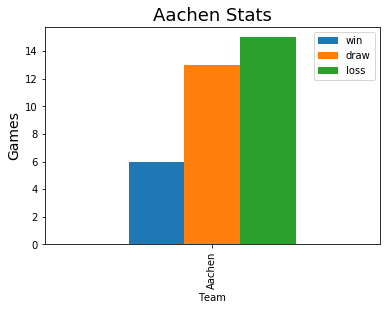

<Figure size 576x432 with 0 Axes>

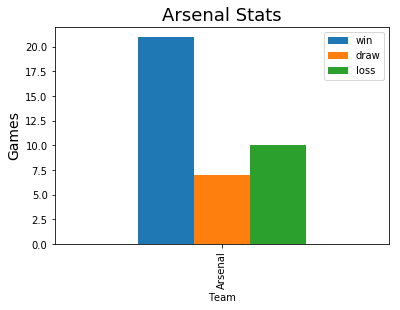

<Figure size 576x432 with 0 Axes>

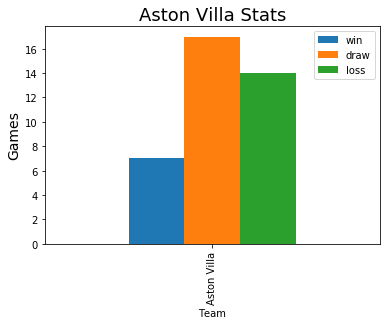

<Figure size 576x432 with 0 Axes>

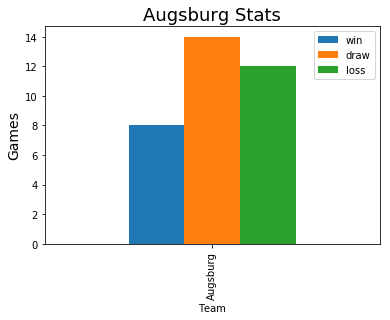

<Figure size 576x432 with 0 Axes>

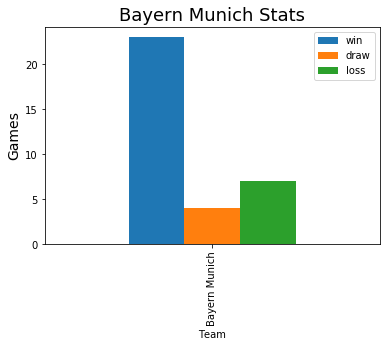

<Figure size 576x432 with 0 Axes>

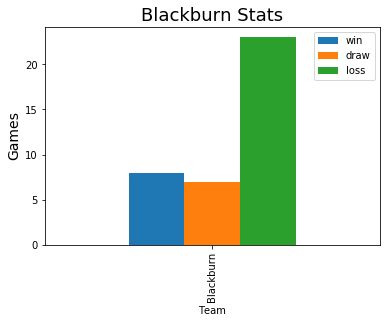

<Figure size 576x432 with 0 Axes>

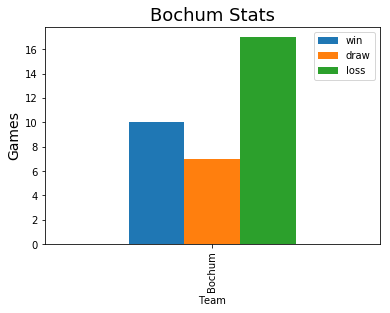

<Figure size 576x432 with 0 Axes>

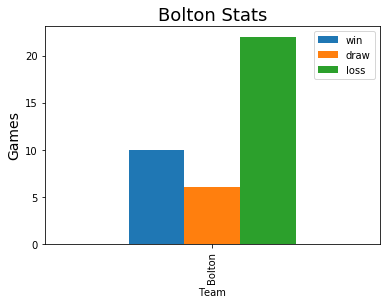

<Figure size 576x432 with 0 Axes>

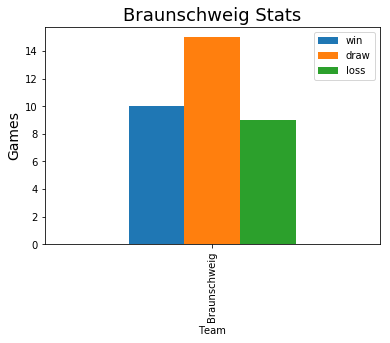

<Figure size 576x432 with 0 Axes>

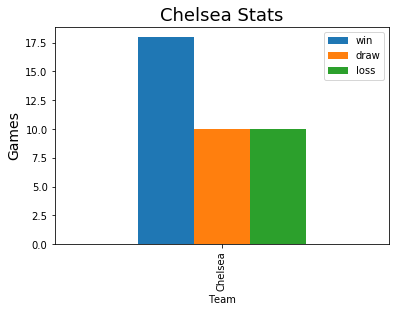

<Figure size 576x432 with 0 Axes>

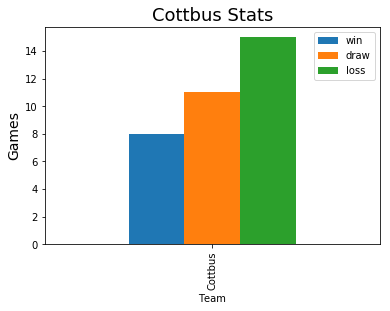

<Figure size 576x432 with 0 Axes>

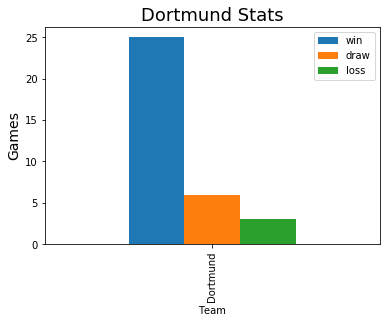

<Figure size 576x432 with 0 Axes>

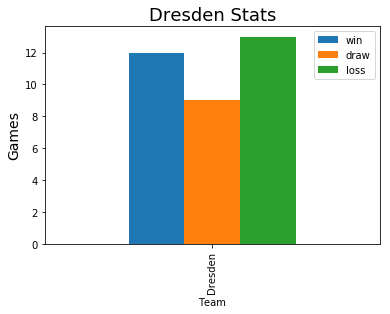

<Figure size 576x432 with 0 Axes>

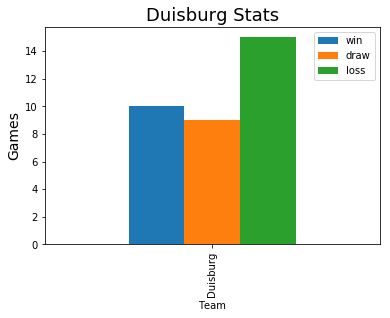

<Figure size 576x432 with 0 Axes>

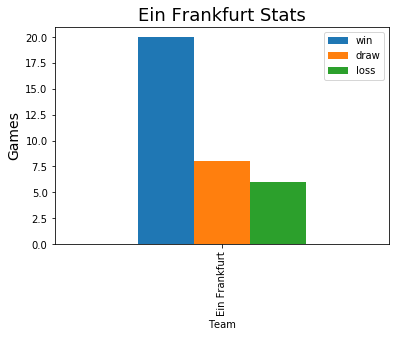

<Figure size 576x432 with 0 Axes>

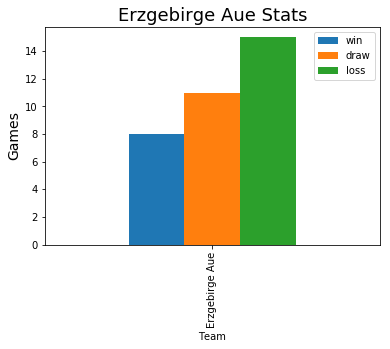

<Figure size 576x432 with 0 Axes>

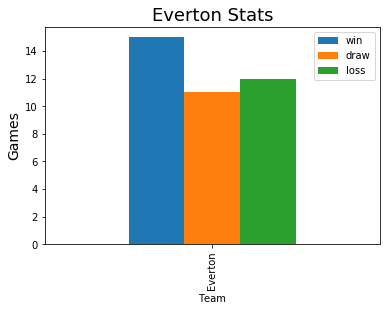

<Figure size 576x432 with 0 Axes>

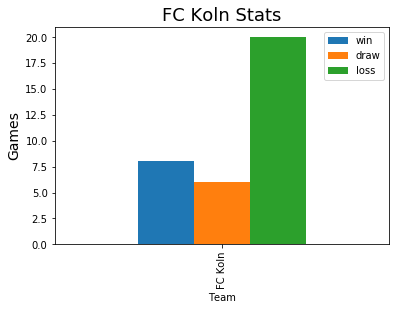

<Figure size 576x432 with 0 Axes>

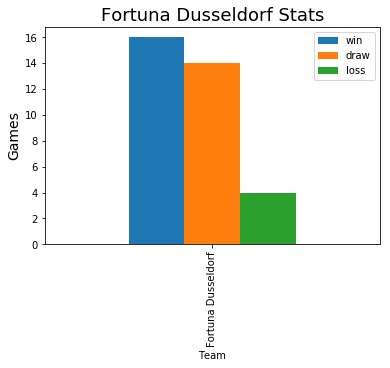

<Figure size 576x432 with 0 Axes>

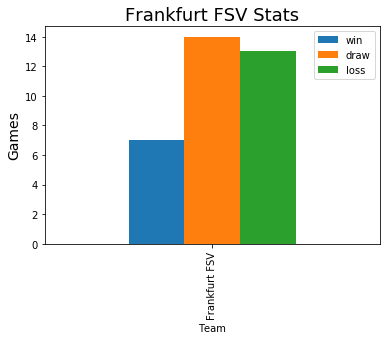

<Figure size 576x432 with 0 Axes>

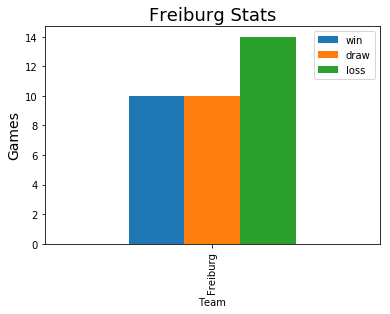

<Figure size 576x432 with 0 Axes>

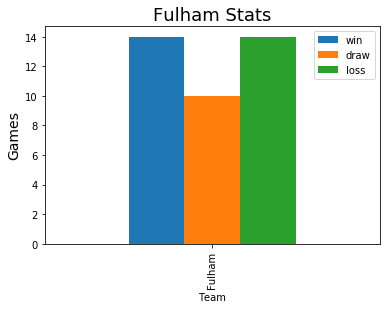

<Figure size 576x432 with 0 Axes>

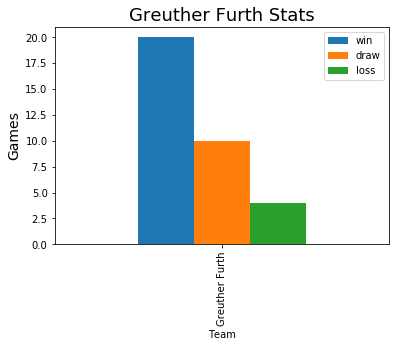

<Figure size 576x432 with 0 Axes>

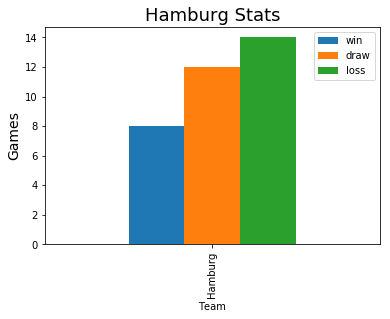

<Figure size 576x432 with 0 Axes>

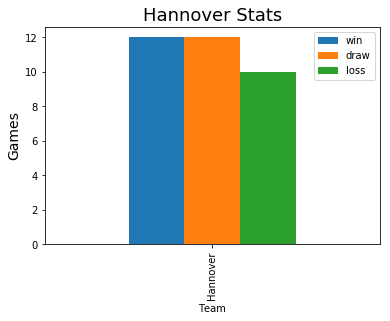

<Figure size 576x432 with 0 Axes>

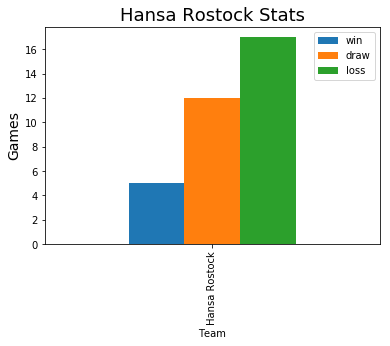

<Figure size 576x432 with 0 Axes>

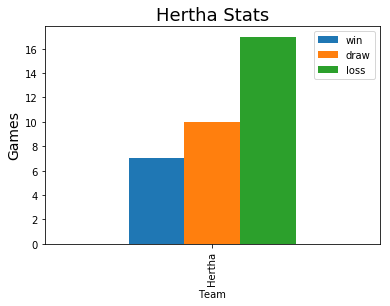

<Figure size 576x432 with 0 Axes>

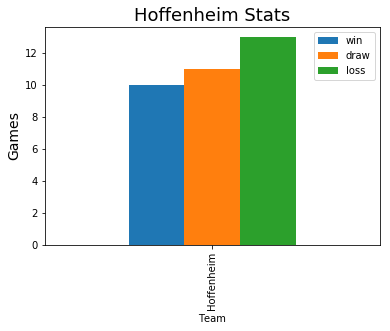

<Figure size 576x432 with 0 Axes>

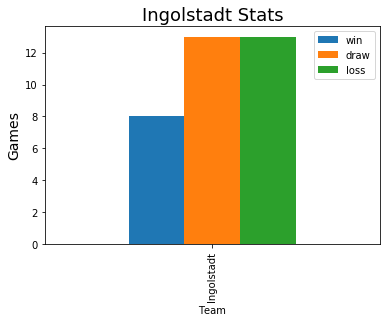

<Figure size 576x432 with 0 Axes>

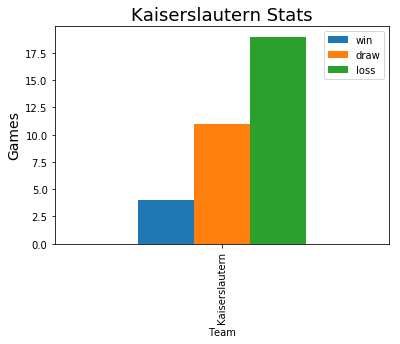

<Figure size 576x432 with 0 Axes>

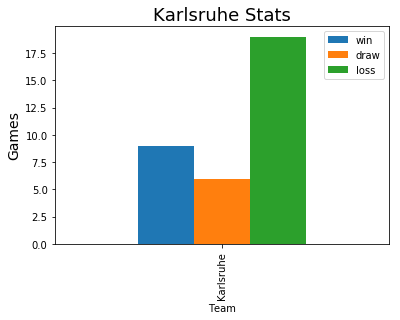

<Figure size 576x432 with 0 Axes>

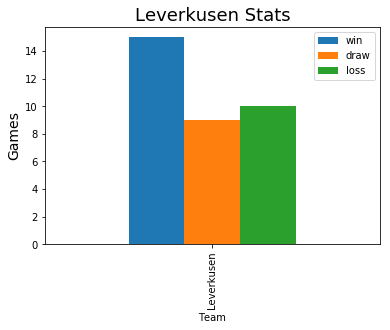

<Figure size 576x432 with 0 Axes>

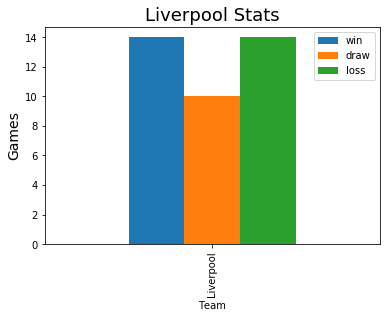

<Figure size 576x432 with 0 Axes>

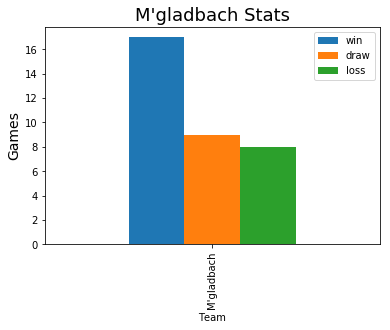

<Figure size 576x432 with 0 Axes>

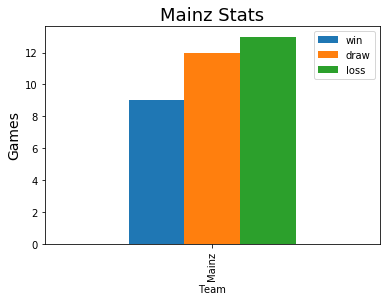

<Figure size 576x432 with 0 Axes>

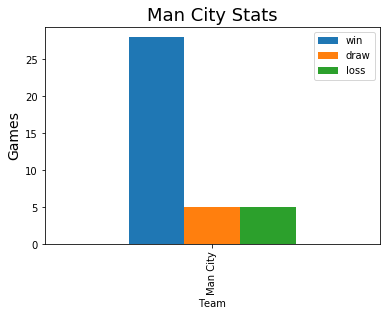

<Figure size 576x432 with 0 Axes>

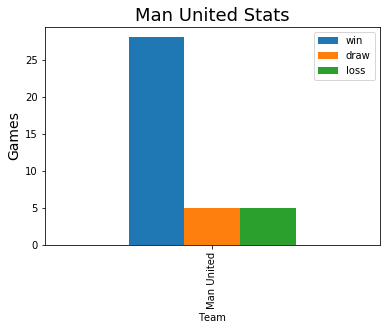

<Figure size 576x432 with 0 Axes>

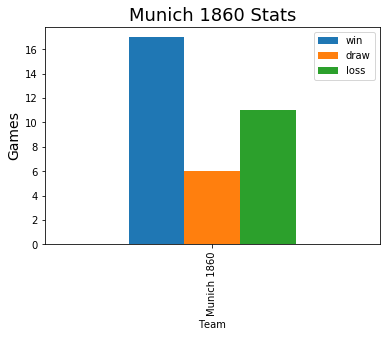

<Figure size 576x432 with 0 Axes>

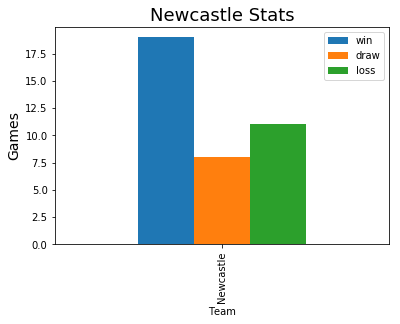

<Figure size 576x432 with 0 Axes>

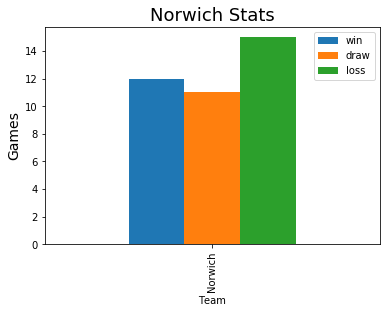

<Figure size 576x432 with 0 Axes>

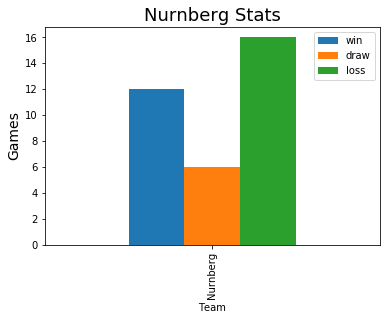

<Figure size 576x432 with 0 Axes>

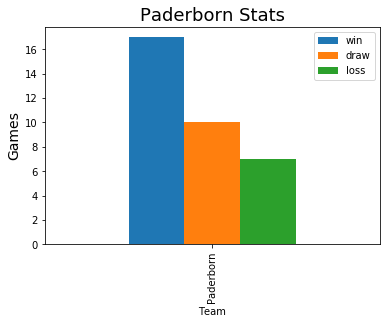

<Figure size 576x432 with 0 Axes>

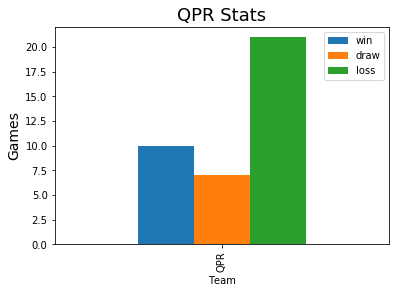

<Figure size 576x432 with 0 Axes>

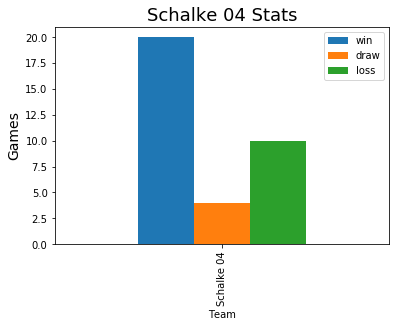

<Figure size 576x432 with 0 Axes>

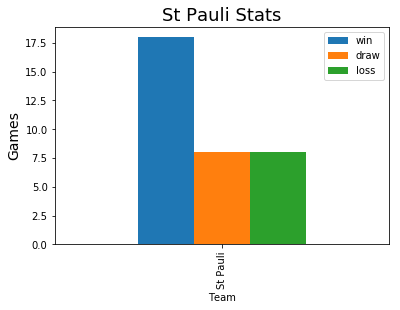

<Figure size 576x432 with 0 Axes>

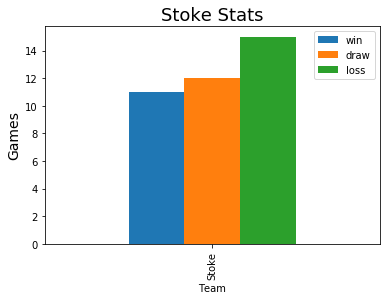

<Figure size 576x432 with 0 Axes>

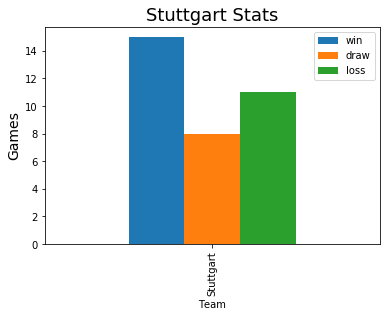

<Figure size 576x432 with 0 Axes>

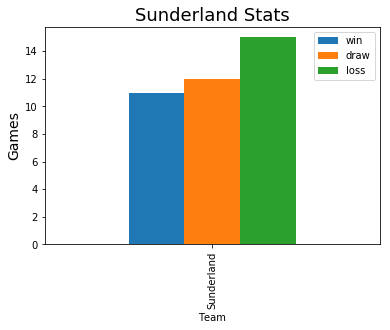

<Figure size 576x432 with 0 Axes>

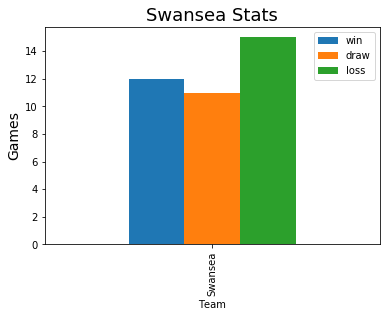

<Figure size 576x432 with 0 Axes>

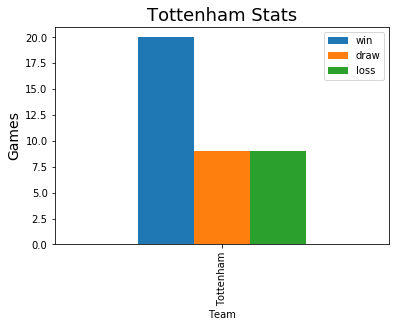

<Figure size 576x432 with 0 Axes>

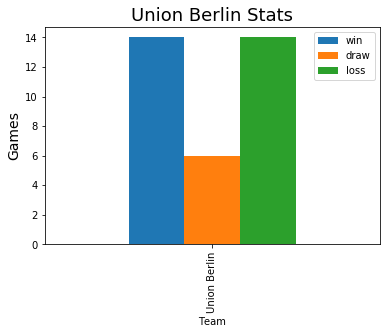

<Figure size 576x432 with 0 Axes>

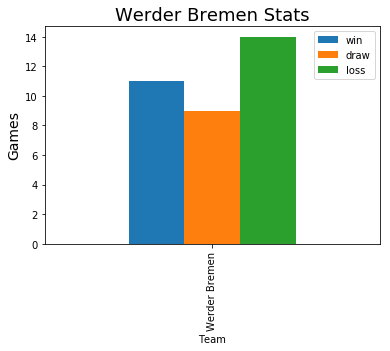

<Figure size 576x432 with 0 Axes>

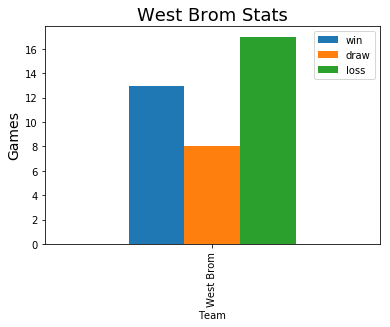

<Figure size 576x432 with 0 Axes>

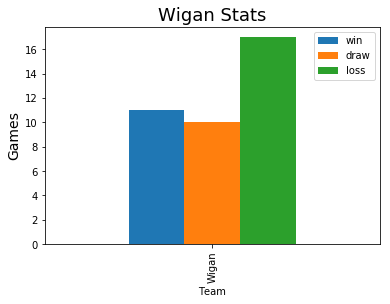

<Figure size 576x432 with 0 Axes>

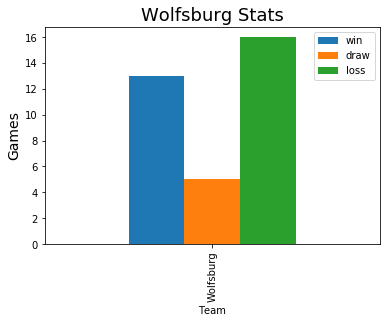

<Figure size 576x432 with 0 Axes>

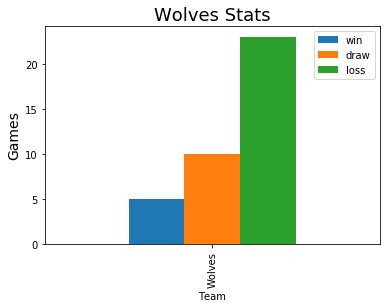

In [527]:
for entry in range(len(teams_df)):
       
    team_name = teams_df['Team'][entry]
    create_hist(team_name)

## Let's look at the database

In [530]:
query = mycol.find({'Team': 'Wolves'})

In [529]:
for q in query:
    print(q)

{'_id': ObjectId('5ce5998a22b4c9ec8a01326f'), 'Team': 'Wolves', 'Goals_x': 40, 'win_x': 5, 'rain_wins_perc': 10.0, 'hist': {'screen_shot': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 3.0.2, http://matplotlib.org/8\x80;\xad\x00\x00 \x00IDATx\x9c\xed\xdd{X\xd6\xf5\xfd\xc7\xf1\xd7\xcdAP1\x0f\x08\x88b\xe2\x81\x08\x85\xa2B\x0c\x0f \x9ej\xbat\x86\xce\xc32\n\xa7\x9b\xb3V.g.\xdb\xef\xc2\xcd\x15#[\x07\xad\x16\xcb9\xf0*\xcdV\x1e\xa7\x96k0\x15kx\x97xfc\xa9%^\xa4\xa0x\xc0\x13\x08\xdf\xdf\x1f\xce\xbb\x085\xab/\xf7\xf7\xfe\xc2\xf3q]^\x17\xf7\xe7\xfb\xe5\xf3y\xdf\xf7u\xc9\xeb\xfa|\xbe\x9f\xfb\xfbu\x18\x86a\x08\x00\x00\x9b\xf1\xb2\xba\x00\x00\x00\xbe\r\x02\x0c\x00`K\x04\x18\x00\xc0\x96\x080\x00\x80-\x11`\x00\x00["\xc0\x00\x00\xb6D\x80\x01\x00l\x89\x00\x03\x00\xd8\x12\x01\x06\x00\xb0%\x02\x0c\x00